In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [3]:
banco = pd.read_csv('bank.csv')
banco_dados = pd.DataFrame(banco)
banco_dados

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
# ALterando nome das colunas 
banco_dados = banco_dados.rename(columns={
    'age': 'Idade',
    'job': 'Trabalho',
    'marital': 'Conjugal',
    'education': 'Educação',
    'default': 'Padrão',
    'balance': 'Saldo',
    'housing': 'Habitação',
    'loan': 'Empréstimo',
    'contact': 'contato',
    'day': 'Dia',
    'month': 'Mês',
    'duration': 'Duração',
    'campaign': 'Campanha',
    'pdays': 'dias',
    'previous': 'anterior',

})
banco_dados

,Idade,Trabalho,Conjugal,Educação,Padrão,Saldo,Habitação,Empréstimo,contato,Dia,Mês,Duração,Campanha,dias,anterior,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
# Salvando dados especificos
colunas_especificas = banco_dados[['Idade', 'Trabalho', 'Educação','Saldo','Empréstimo','Conjugal','Habitação']]
colunas_especificas

,Idade,Trabalho,Educação,Saldo,Empréstimo,Conjugal,Habitação
0,30,unemployed,primary,1787,no,married,no
1,33,services,secondary,4789,yes,married,yes
2,35,management,tertiary,1350,no,single,yes
3,30,management,tertiary,1476,yes,married,yes
4,59,blue-collar,secondary,0,no,married,yes
...,...,...,...,...,...,...,...
4516,33,services,secondary,-333,no,married,yes
4517,57,self-employed,tertiary,-3313,yes,married,yes
4518,57,technician,secondary,295,no,married,no
4519,28,blue-collar,secondary,1137,no,married,no


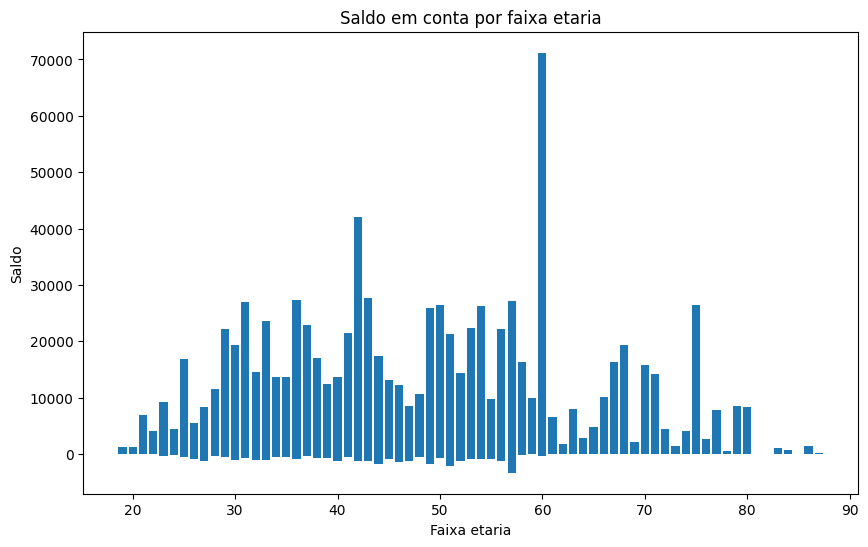

In [6]:
# Saldo por faixa etaria
eixo_x = colunas_especificas['Idade']
eixo_y = colunas_especificas['Saldo']

plt.figure(figsize=(10, 6))
plt.bar(eixo_x, eixo_y)

plt.title('Saldo em conta por faixa etaria')
plt.xlabel('Faixa etaria')
plt.ylabel('Saldo')


plt.show()

In [7]:
# Alterar os valores na coluna 
colunas_especificas.loc[colunas_especificas['Educação'] == 'primary', 'Educação'] = 'Ensino fundamental'
colunas_especificas.loc[colunas_especificas['Educação'] == 'secondary', 'Educação'] = 'Ensino médio'
colunas_especificas.loc[colunas_especificas['Educação'] == 'tertiary', 'Educação'] = 'Superior'
colunas_especificas.loc[colunas_especificas['Educação'] == 'unknown', 'Educação'] = 'Desconhecido'

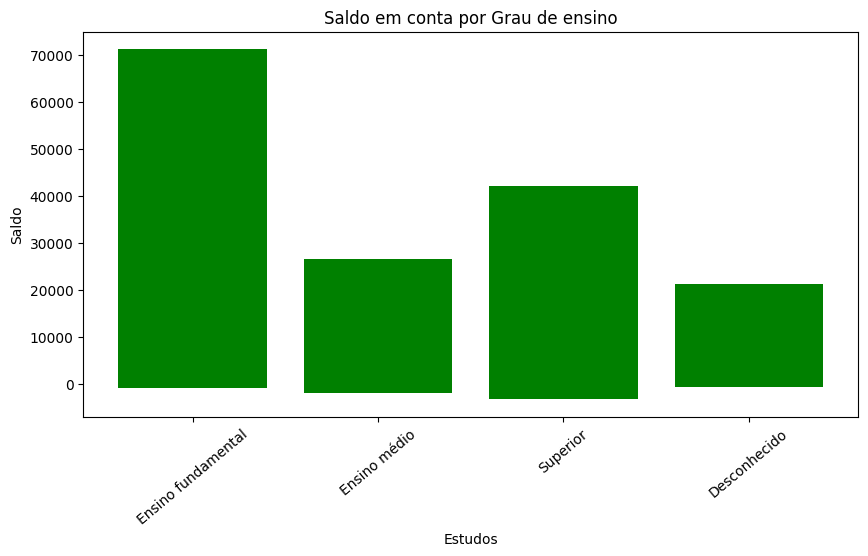

In [8]:
# Saldo por grau de ensino
plt.figure(figsize=(10, 5)) # Tamanho da fonte
plt.bar(colunas_especificas['Educação'], colunas_especificas['Saldo'],color='green')

plt.title('Saldo em conta por Grau de ensino')
plt.xlabel('Estudos')
plt.xticks(rotation=40)
plt.ylabel('Saldo')
plt.show()

In [9]:
# Alterar os valores na coluna 
colunas_especificas.loc[colunas_especificas['Conjugal'] == 'married', 'Conjugal'] = 'Casado'
colunas_especificas.loc[colunas_especificas['Conjugal'] == 'single', 'Conjugal'] = 'Solteiro'
colunas_especificas.loc[colunas_especificas['Conjugal'] == 'divorced', 'Conjugal'] = 'Divorciado'

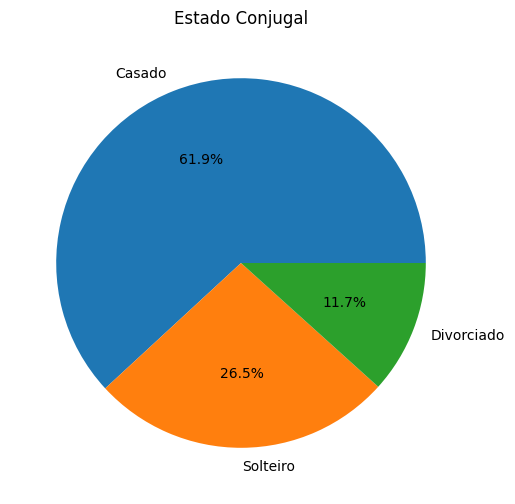

In [10]:
# Contar a ocorrência de cada valor na coluna 'Conjugal'
Contagem_educacao = colunas_especificas['Conjugal'].value_counts()

# Criar o gráfico de pizza com Matplotlib
plt.figure(figsize=(10, 6))
plt.pie(Contagem_educacao, labels=Contagem_educacao.index, autopct='%1.1f%%')
plt.title('Estado Conjugal')

# Exibir o gráfico
plt.show()

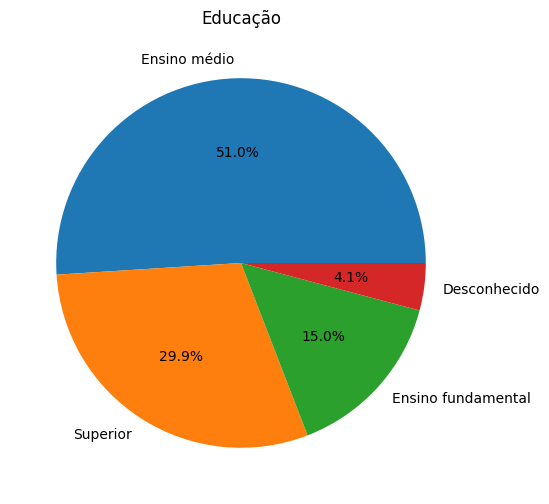

Total do ensino fundamental: 678 
Total do ensino médio: 2306 
Total do ensino superior: 1350 
Valor desconhecido: 187


In [50]:
# Porcentagem de quem 
Contagem_educacao = colunas_especificas['Educação'].value_counts()

# Criar o gráfico de pizza com Matplotlib
plt.figure(figsize=(10, 6))
plt.pie(Contagem_educacao, labels=Contagem_educacao.index, autopct='%1.1f%%')
plt.title('Educação')

# Exibir o gráfico
plt.show()

# soamndo os valores
total_medio = (colunas_especificas['Educação'] == 'Ensino médio').sum()
total_superior = (colunas_especificas['Educação'] == 'Superior').sum()
total_fundamental = (colunas_especificas['Educação'] == 'Ensino fundamental').sum()
total_desconhecido = (colunas_especificas['Educação'] == 'Desconhecido').sum()

# Mostrando os valores 
print(
    f'Total do ensino fundamental: {total_fundamental} \n'
    f'Total do ensino médio: {total_medio} \n'
    f'Total do ensino superior: {total_superior} \n'
    f'Valor desconhecido: {total_desconhecido}'
)


In [12]:
colunas_especificas.loc[colunas_especificas['Habitação'] == 'yes', 'Habitação'] = 'Sim'
colunas_especificas.loc[colunas_especificas['Habitação'] == 'no', 'Habitação'] = 'Não'

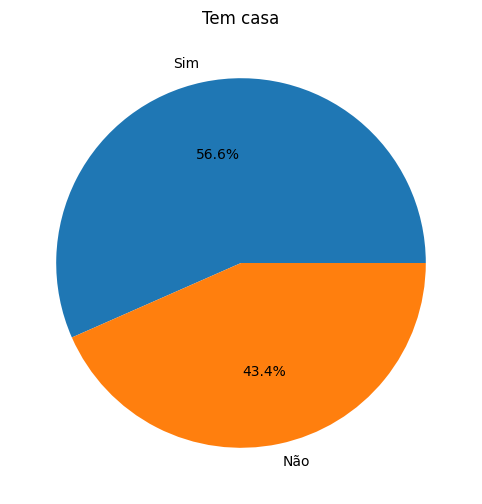

Tem casa: 2559 
Não tem: 1962


In [51]:
# Porcentagem por habitação
Contagem_habitacao = colunas_especificas['Habitação'].value_counts()

# Criando grafico de pizza
plt.figure(figsize=(10, 6))
plt.pie(Contagem_habitacao, labels=Contagem_habitacao.index, autopct='%1.1f%%')
plt.title('Tem casa')

# Exibir grafico
plt.show()

# Contar todos os valores que são iguais a 'sim' na coluna 'Empréstimo'
total_sim = (colunas_especificas['Habitação'] == 'Sim').sum()
total_nao = (colunas_especificas['Habitação'] == 'Não').sum()
print(
    f'Tem casa: {total_sim} \n'
    f'Não tem: {total_nao}'
)
# Imprimir os valores únicos na coluna 'Empréstimo'
#print(colunas_especificas['Empréstimo'].unique())


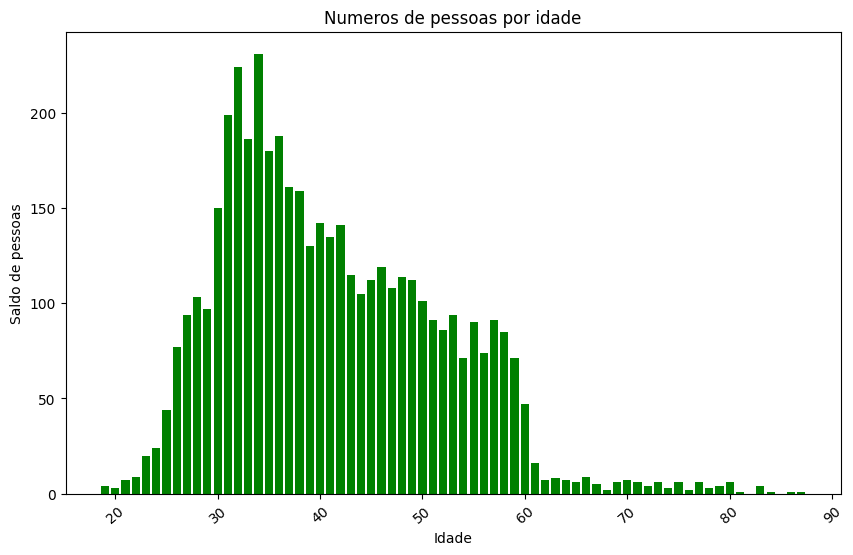

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: Idade, dtype: float64


In [23]:
# contagem do numero de pessoas por idade
eixo_x = colunas_especificas['Idade'].value_counts().keys()
eixo_y = colunas_especificas['Idade'].value_counts().values

plt.figure(figsize=(10, 6))
plt.bar(eixo_x, eixo_y,color='green')

plt.title('Numeros de pessoas por idade')
plt.xlabel('Idade')
plt.xticks(rotation=40)
plt.ylabel('Saldo de pessoas')
plt.show()

contagem_de_pessoas = colunas_especificas['Idade'].describe()
print(contagem_de_pessoas)

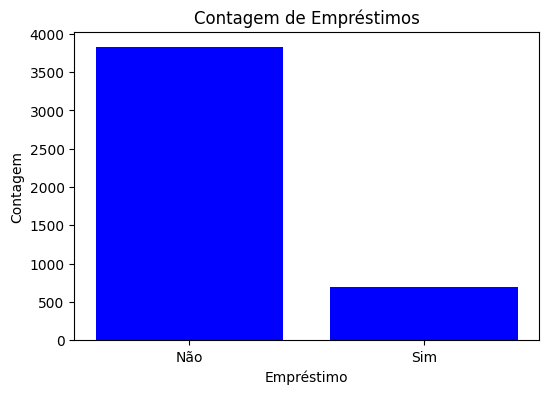

Empréstimo
Não    3830
Sim     691
Name: count, dtype: int64


In [19]:
# Calcular a contagem de empréstimos
contagem_emprestimos = colunas_especificas['Empréstimo'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(contagem_emprestimos.index, contagem_emprestimos, color='blue')

# Adicionar título e rótulos dos eixos
plt.title('Contagem de Empréstimos')
plt.xlabel('Empréstimo')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()

print(contagem_emprestimos)



In [16]:
colunas_especificas.loc[colunas_especificas['Empréstimo'] == 'yes', 'Empréstimo'] = 'Sim'
colunas_especificas.loc[colunas_especificas['Empréstimo'] == 'no', 'Empréstimo'] = 'Não'

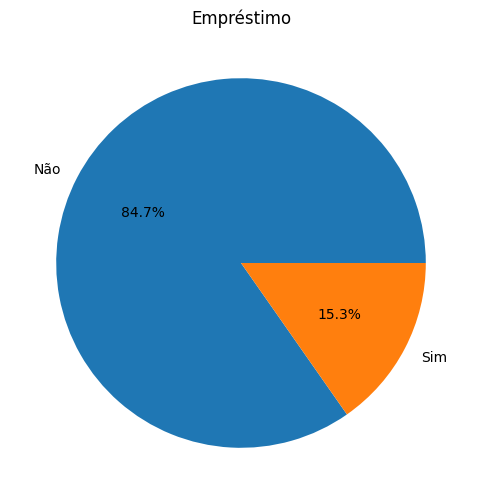

In [17]:
Contagem_emprestimo = colunas_especificas['Empréstimo'].value_counts()

# Criar o gráfico de pizza com Matplotlib
plt.figure(figsize=(10, 6))
plt.pie(Contagem_emprestimo, labels=Contagem_emprestimo.index, autopct='%1.1f%%')
plt.title('Empréstimo')

# Exibir o gráfico
plt.show()